## <font color=dark red> Data Loading </font>

#### <font color=blue> Step 1 - Load EST 1 and EST 2 files. </font>

In [1]:
# Import data

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

columns_of_interest = ['device_number','device_description','site','work_order_number','work_order_priority_description','wo_type_description','problem_reported','lot_year','num_parts_from_storeroom','num_parts_from_po','repair_part_number','repair_part_name']

In [2]:
len(columns_of_interest)

12

In [3]:
# Update file path below - 

df1 = pd.read_excel(r'data\EST 1.xlsx')
df2 = pd.read_excel(r'data\EST 2.xlsx')

In [4]:
df1.shape

(64996, 41)

In [5]:
df2.shape

(44586, 35)

In [6]:
df1.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40'],
      dt

In [7]:
df2.columns

Index(['TFA', 'SUBTFA', 'SYSTEMID', 'DEVICE NUMBER', 'DEVICE DESCRIPTION',
       'DEVICE SERIAL NUMER', 'SITE', 'WORK ORDER NUMBER',
       'WORK ORDER DESCRIPTION', 'WORK ORDER PRIORITY DESCRIPTION',
       'WOTYPE_DESCRIPTION', 'FUNCTIONAL LOCATION DRILL DOWN',
       'FUNCTIONAL LOCATION DESCRIPTION', 'PROBLEMREPORTED', 'ACTIONCOMPLETED',
       'TIME TO RETURN (Days.% of 24hrs)', 'LOT YEAR',
       'AFFECTED PART UNIQUE IDENTIFIER', 'AFFECTED PART NUMBER',
       'AFFECTED PART NAME', 'AFFECTED PART SERIAL NUMBER',
       'MAINTENANCE ACTION', 'NUMPARTSFROMSTOREROOM', 'NUMPARTSFROMPO',
       'DATE SENT TO VENDOR', 'DATE RECEIVED FROM VENDOR',
       'REPAIR PART OWNERSHIP', 'REPAIR PART NUMBER', 'REPAIR PART NAME',
       'REPAIR PART SERIAL NUMBER', 'REPAIR PART STOCKTYPE', 'REPAIR CATEGORY',
       'REPAIR PART FARCODE', 'TOTAL WORK ORDER LABOR', 'LONG DESCRIPTION'],
      dtype='object')

#### <font color=blue> Step 2 - Rename columns names by replacing whitespace with underscore, coverting to lowercase. </font>

In [8]:
df1.columns = df1.columns.str.strip().str.lower().str.replace(" ","_")
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ","_")

In [9]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wotype_description', 'functional_location_drill_down',
       'functional_location_description', 'problemreported', 'actioncompleted',
       'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'numpartsfromstoreroom', 'numpartsfrompo',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40'],
      dt

In [10]:
df1 = df1.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")
df2 = df2.rename({'wotype_description':'wo_type_description','problemreported':'problem_reported',\
           'numpartsfromstoreroom':'num_parts_from_storeroom','numpartsfrompo':'num_parts_from_po'},axis='columns',errors="raise")

In [11]:
df1.columns

Index(['tfa', 'subtfa', 'systemid', 'device_number', 'device_description',
       'device_serial_numer', 'site', 'work_order_number',
       'work_order_description', 'work_order_priority_description',
       'wo_type_description', 'functional_location_drill_down',
       'functional_location_description', 'problem_reported',
       'actioncompleted', 'time_to_return_(days.%_of_24hrs)', 'lot_year',
       'affected_part_unique_identifier', 'affected_part_number',
       'affected_part_name', 'affected_part_serial_number',
       'maintenance_action', 'num_parts_from_storeroom', 'num_parts_from_po',
       'date_sent_to_vendor', 'date_received_from_vendor',
       'repair_part_ownership', 'repair_part_number', 'repair_part_name',
       'repair_part_serial_number', 'repair_part_stocktype', 'repair_category',
       'repair_part_farcode', 'total_work_order_labor', 'long_description',
       'unnamed:_35', 'unnamed:_36', 'unnamed:_37', 'unnamed:_38',
       'unnamed:_39', 'unnamed:_40'],


#### <font color=blue> Step 3 - Filter out unwanted columns from dataframes. </font>

In [12]:
df1_new = df1[df1.columns.intersection(columns_of_interest)].copy()
df2_new = df2[df2.columns.intersection(columns_of_interest)].copy()

In [13]:
df1_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name'],
      dtype='object')

In [14]:
len(df1_new.columns)

12

In [15]:
df1_new.shape

(64996, 12)

In [16]:
len(df2_new.columns)

12

In [17]:
df2_new.columns

Index(['device_number', 'device_description', 'site', 'work_order_number',
       'work_order_priority_description', 'wo_type_description',
       'problem_reported', 'lot_year', 'num_parts_from_storeroom',
       'num_parts_from_po', 'repair_part_number', 'repair_part_name'],
      dtype='object')

In [18]:
df2_new.shape

(44586, 12)

#### <font color=blue> Step 4 - Concatenate the two datasets </font>

In [19]:
type(df2_new)

pandas.core.frame.DataFrame

In [20]:
df_main = pd.concat([df1_new,df2_new],axis=0,ignore_index = True)

In [21]:
df_main.shape

(109582, 12)

In [22]:
df_main.head()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name
0,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6766881,Corrective Maintenance,Corrective COR,2015-04-03 10:40:00,6.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder
1,07-129,Engagement Skills Trainer (EST) 2000,"Ft Sill, OK",5780918,Corrective Maintenance,Corrective COR,2013-05-30 13:00:00,5.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder
2,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6305062,Corrective Maintenance,Corrective COR,2014-05-30 16:48:00,6.0,0.0,0.0,No parts issued to workorder,No parts issued to workorder
3,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19 13:18:00,6.0,2.0,0.0,93135A076,"SCREW, NYLON MOUNTING, SENSOR BOARD (CUBIC) M1..."
4,07-129,Engagement Skills Trainer (EST) 2000,"Ft Leonard Wood, MO",6425405,Corrective Maintenance,Corrective COR,2014-08-19 13:18:00,6.0,2.0,0.0,924013066,"BOARD, SENSOR , M4 / M16 , CUBIC"


## <font color=dark red> Data Cleansing </font>

#### <font color=blue> Step 1 - Convert problem_reported column to date column. The column values are already of datetime type.</font>

In [23]:
df_main['problem_reported'], type(df_main['problem_reported'])

(0        2015-04-03 10:40:00
 1        2013-05-30 13:00:00
 2        2014-05-30 16:48:00
 3        2014-08-19 13:18:00
 4        2014-08-19 13:18:00
                  ...        
 109577   2013-08-21 14:39:14
 109578   2014-12-19 13:48:18
 109579   2014-12-19 13:48:18
 109580   2014-12-19 13:48:18
 109581                   NaT
 Name: problem_reported, Length: 109582, dtype: datetime64[ns],
 pandas.core.series.Series)

In [24]:
df_main['problem_reported'] = df_main.problem_reported.dt.date

In [25]:
df_main['problem_reported']

0         2015-04-03
1         2013-05-30
2         2014-05-30
3         2014-08-19
4         2014-08-19
             ...    
109577    2013-08-21
109578    2014-12-19
109579    2014-12-19
109580    2014-12-19
109581           NaT
Name: problem_reported, Length: 109582, dtype: object

In [26]:
# df_main = df_main.rename({'problem_reported':'date'},axis='columns',errors="raise")

In [27]:
df_main['problem_reported']

0         2015-04-03
1         2013-05-30
2         2014-05-30
3         2014-08-19
4         2014-08-19
             ...    
109577    2013-08-21
109578    2014-12-19
109579    2014-12-19
109580    2014-12-19
109581           NaT
Name: problem_reported, Length: 109582, dtype: object

#### <font color=blue> Step 2 - Removing all records that have a description of 'Modification Government' & 'Operational Support' & 'Exercise Support' & 'Log Problem'</font>

In [28]:
df_main.wo_type_description.unique()

array(['Corrective COR', 'Modification Government', 'Preventive PM',
       'Operational Support', 'Exercise Support', 'Log Problem', nan],
      dtype=object)

In [29]:
df_main = df_main.drop(df_main.index[df_main['wo_type_description'].str.contains('Modification Government' or 'Operational Support' or 'Exercise Support' or 'Log Problem', na=False)])

In [30]:
df_main.shape

(108628, 12)

#### <font color=blue> Step 3 - Removing all rows that have values of 'Move/Modify/Upgrade' & 'Exercise/Operational Support' in the 'work_order_priority_description' column. </font>

In [31]:
df_main.work_order_priority_description.unique()

array(['Corrective Maintenance', 'PMCS', 'System - Device Degraded',
       'Bench/Depot Repair', 'System - Device Down',
       'Exercise/Operational Support', 'Move/Modify/Upgrade', nan],
      dtype=object)

In [32]:
df_main = df_main.drop(df_main.index[df_main['work_order_priority_description'].str.contains('Move/Modify/Upgrade' or 'Exercise/Operational Support', na=False)])

In [33]:
df_main.shape

(108609, 12)

#### <font color=blue> Step 4 - Removing all rows that have values of 'No parts issued to workorder'in the 'repair_part_number' column. </font>

In [34]:
df_main.repair_part_number.unique()

array(['No parts issued to workorder', '93135A076', '924013066', ...,
       'S-15356X', 'S-15356L', '28301'], dtype=object)

In [35]:
df_main = df_main.drop(df_main.index[df_main['repair_part_number'].str.contains('No parts issued to workorder', na=False)])

In [36]:
df_main.shape

(84866, 12)

#### <font color=blue> Before we move onto the next step, lets check for nan values.</font>

In [37]:
df_main.tail()

,device_number,device_description,site,work_order_number,work_order_priority_description,wo_type_description,problem_reported,lot_year,num_parts_from_storeroom,num_parts_from_po,repair_part_number,repair_part_name
109574,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,6668843,Bench/Depot Repair,Corrective COR,2015-05-01,6.0,8.0,0.0,28301,"SCREW, 6-32X3/8 IN. PHILLIPS FLATHEAD MACHINE,..."
109578,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,KA10F09,"FILTER, COALESCING (FILTER ONLY), JUN-AIR"
109579,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,1.0,0.0,201112,"CONNECTOR, T-JOINT , GRAINGER"
109580,07-129,Engagement Skills Trainer (EST) 2000,Warfighter Support Center,DR6560719,Bench/Depot Repair,Corrective COR,2014-12-19,6.0,3.0,0.0,70MDD,"GAUGE , AIR COMPRESSOR, Y-PACK, JUN-AIR"
109581,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [38]:
# for col in df_main:
#     print(df_main[col].name,'=',df_main[col].unique())

df_main.isnull().sum()

device_number                      2
device_description                 2
site                               2
work_order_number                  2
work_order_priority_description    2
wo_type_description                2
problem_reported                   2
lot_year                           2
num_parts_from_storeroom           2
num_parts_from_po                  2
repair_part_number                 2
repair_part_name                   2
dtype: int64

In [39]:
# lets remove the two rows with nan values.
df_main = df_main.dropna(axis=0)

In [40]:
df_main.shape

(84864, 12)

## <font color=dark red> Reporting </font>

#### <font color=blue> Generating a view that displays the number of remaining records.</font>

In [41]:
total_records = df_main.shape[0]

In [42]:
total_records

84864

In [43]:
wo_typedesc_df = df_main['wo_type_description'].value_counts().to_frame()

In [44]:
wo_typedesc_df

,wo_type_description
Corrective COR,84647
Preventive PM,202
Operational Support,15


In [45]:
wo_prioritydesc_df = df_main['work_order_priority_description'].value_counts().to_frame()

In [46]:
wo_prioritydesc_df

,work_order_priority_description
Corrective Maintenance,46412
Bench/Depot Repair,36679
System - Device Down,863
System - Device Degraded,396
Exercise/Operational Support,257
PMCS,257


In [47]:
# Set label size for plots
matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10)
sns.set_context("poster")
# plt.rcParams.update({'font.size': 10})

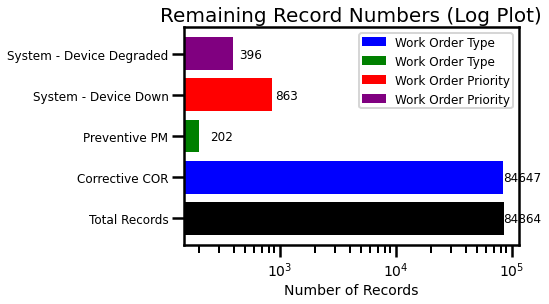

In [48]:
plt.barh('Total Records',total_records, color = 'k',log=True)
plt.barh('Corrective COR',wo_typedesc_df.loc['Corrective COR'][0],color = 'b',label = 'Work Order Type')
plt.barh('Preventive PM',wo_typedesc_df.loc['Preventive PM'][0],color = 'g',label = 'Work Order Type')
plt.barh('System - Device Down',wo_prioritydesc_df.loc['System - Device Down'][0],color = 'r',label = 'Work Order Priority')
plt.barh('System - Device Degraded',wo_prioritydesc_df.loc['System - Device Degraded'][0],color = 'purple',label = 'Work Order Priority')

values = [total_records,wo_typedesc_df.loc['Corrective COR'][0],wo_typedesc_df.loc['Preventive PM'][0],wo_prioritydesc_df.loc['System - Device Down'][0],wo_prioritydesc_df.loc['System - Device Degraded'][0]]
i = 1
j = 50
for i in range(len(values)):
    plt.annotate(values[i], (values[i] + j, -0.1 + i), fontsize=12)

plt.title('Remaining Record Numbers (Log Plot)',fontsize=20)
plt.xlabel('Number of Records',fontsize=14)
plt.legend(borderpad=0.2,prop={'size':12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
# plt.xlim(0,10^6)
# plt.figsize=(20, 20)
plt.savefig('Remaining_Records.png',dpi=120, facecolor='w',orientation='potrait', bbox_inches="tight")
plt.show()

## <font color=dark red> Exploratory Data Analysis (EDA) </font>

#### <font color=blue> Step 1 - Generating a view that displays the minimum and maximum Problem Reported Dates.</font>

In [49]:
# Earliest and latest problem reported dates for all the records

df_main['problem_reported'].agg(['min','max'])

min    2009-03-07
max    2015-11-12
Name: problem_reported, dtype: object

In [50]:
# The least number of problems reported for any day was 1 , and the maximum number of problems were reported
# on March 3, 2014. A total of 311 problems reported.

df_main['problem_reported'].value_counts(ascending=True)

2013-10-05      1
2013-10-12      1
2014-03-22      1
2014-06-08      1
2009-03-07      1
             ... 
2014-08-19    270
2014-10-06    280
2013-03-15    297
2014-03-31    301
2014-12-03    311
Name: problem_reported, Length: 1052, dtype: int64

In [51]:
#Earliest and latest problem reported dates for records in 'wo_type_description' group.
df_main.groupby('wo_type_description').problem_reported.agg(['min','max'])

,min,max
wo_type_description,,
Corrective COR,2009-03-07,2015-11-12
Operational Support,2012-06-27,2014-06-18
Preventive PM,2012-05-16,2015-04-27


In [52]:
#Earliest and latest problem reported dates for records in 'work_order_priority_description' group.
df_main.groupby('work_order_priority_description').problem_reported.agg(['min','max'])

,min,max
work_order_priority_description,,
Bench/Depot Repair,2010-02-16,2015-07-13
Corrective Maintenance,2009-03-07,2015-11-12
Exercise/Operational Support,2012-05-08,2015-05-05
PMCS,2012-05-16,2015-04-27
System - Device Degraded,2011-09-12,2015-04-30
System - Device Down,2012-05-01,2015-04-30


#### <font color=blue> Step 2 - Generating a view that displays the total parts used by adding 'num_parts_from_storeroom' + 'num_parts_from_po'.</font>

In [53]:
df_main['total_parts_used'] = df_main['num_parts_from_storeroom'] + df_main['num_parts_from_po']

In [54]:
#Additional column added with the name 'total_parts_used'
df_main.shape

(84864, 13)

In [55]:
df_main.groupby('wo_type_description').total_parts_used.sum().to_frame()

,total_parts_used
wo_type_description,
Corrective COR,278616.0
Operational Support,131.0
Preventive PM,1057.0


In [56]:
df_main.groupby('work_order_priority_description').total_parts_used.sum().to_frame()

,total_parts_used
work_order_priority_description,
Bench/Depot Repair,163057.0
Corrective Maintenance,112150.0
Exercise/Operational Support,1165.0
PMCS,889.0
System - Device Degraded,709.0
System - Device Down,1834.0


#### <font color=blue> Step 3 - Generating a view that displays the count of different parts used by distinct 'repair_part_number'.</font>

In [57]:
pd.set_option('display.max_rows',None)

In [58]:
df_main.groupby('wo_type_description').repair_part_number.value_counts().to_frame()

repair_part_number
wo_type_description repair_part_number                            
Corrective COR      924013066                                 6452
                    1021502                                   3539
                    91253A104                                 3064
                    921342660                                 1862
                    93135A076                                 1671
                    95647A111                                 1622
                    94812A111                                 1571
                    4257840300437                             1447
                    921341127                                 1326
                    924013048                                 1229
                    6002ST                                    1219
                    TAPD20M4BS                                1048
                    CR2032                                    1044
                    MS28775-011                               1019
                    1004328-01                                 966
                    91251A062                                  964
                    AS008                                      825
                    15400025                                   823
                    0537-00-1-20                               711
                    921341197                                  662
                    921341134                                  658
                    1008998                                    645
                    924013084                                  645
                    1021498                                    634
                    92220A172                                  612
                    921341185                                  588
                    1021928                                    578
                    210133-GS                                  550
                    921341194                                  543
                    1017151                                    534
                    1008997                                    513
                    50079-8100                                 510
                    SMLS-1012-316-ORING                        504
                    924013086                                  491
                    R9841761                                   486
                    921341192                                  474
                    1017261-01                                 456
                    1021499                                    452
                    170774                                     451
                    LCD100-04                                  438
                    9464K181                                   437
                    921340153-CLIP                             416
                    202K142-25-0                               412
                    1874                                       407
                    1020827                                    384
                    1009611-02                                 351
                    921340153                                  315
                    1017120                                    305
                    FGG.2B.310.CYCD62                          304
                    921341600                                  294
                    GMA-15A                                    292
                    2318-0                                     287
                    921340153-LABEL                            281
                    90241A216                                  280
                    90295A020                                  280
                    921341130                                  250
                    1016841                                    248
                    921341143                                  245
                    1009545 

In [59]:
df_main.groupby('work_order_priority_description').repair_part_number.value_counts().to_frame()

repair_part_number
work_order_priority_description repair_part_number                            
Bench/Depot Repair              924013066                                 2409
                                91253A104                                 1343
                                95647A111                                 1040
                                1021502                                    891
                                93135A076                                  717
                                94812A111                                  666
                                91251A062                                  634
                                CR2032                                     622
                                AS008                                      607
                                921342660                                  561
                                921341127                                  560
                                R9841761                                   455
                                50079-8100                                 418
                                92220A172                                  398
                                924013048                                  388
                                924013084                                  366
                                921340153-CLIP                             357
                                1004328-01                                 348
                                LCD100-04                                  316
                                4257840300437                              284
                                SMLS-1012-316-ORING                        242
                                924013086                                  240
                                0537-00-1-20                               236
                                FGG.2B.110.CZZ                             232
                                921341197                                  229
                                921340153-LABEL                            226
                                A1101EUA-T                                 226
                                96006A210                                  220
                                1008998                                    202
                                9464K181                                   200
                                921341194                                  183
                                921341134                                  182
                                921341192                                  182
                                921341185                                  177
                                1874                                       164
                                1008997                                    159
                                M23053/5-109-0                             159
                                51021-0500                                 153
                                A1325LUA-T                                 153
                                MS28775-011                                153
                                FGG.2B.310.CYCD62                          149
                                M22759/11-26-9                             148
                                7M-16.000MEEQ-T                            146
                                921341149                                  146
                                KQ2H13-35S                                 145
                                A3245ELHLT-T                               140
                                921340192                                  138
                                R724393K                                   138
                                GRM188R61A105KA61D                         137
                               